In [0]:
import numpy as np

In [0]:
np.random.seed(34)

In [3]:
import keras

Using TensorFlow backend.


In [0]:
from keras.datasets import cifar10

In [5]:
(X_train, y_train), (X_test, y_test) =cifar10.load_data()

170500096/170498071 [==============================] - 11s 0us/step


In [0]:
from keras.models import Sequential

In [0]:
from keras.layers import Dense, Convolution2D, Flatten, Activation, MaxPooling2D, Dropout

In [0]:
from keras.optimizers import SGD

In [0]:
import matplotlib.pyplot as plt

In [0]:
X_train.shape

(60000, 28, 28)

In [0]:
y_train.shape

(60000,)

In [0]:
X = X_train[101].reshape([28,28])

In [0]:
plt.gray()

<Figure size 432x288 with 0 Axes>

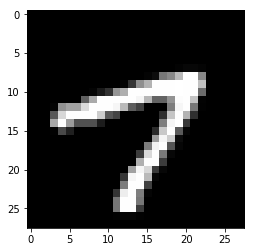

In [0]:
plt.imshow(X)

In [0]:
y_train[101]

7

In [0]:
X_test.shape

(10000, 28, 28)

In [0]:
y_test.shape

(10000,)

In [0]:
type(X_train[0])

numpy.ndarray

In [0]:
X_train =X_train.astype('float32') / 255

In [0]:
X_test =X_test.astype('float32') / 255

In [0]:
X_train[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

In [0]:
n_classes =10

In [0]:
y_train = keras.utils.to_categorical(y_train, n_classes)
y_test = keras.utils.to_categorical(y_test, n_classes)

In [13]:
X_train.shape[0]

50000

In [0]:
y_train.shape

(60000, 10)

In [0]:
X_train = X_train.reshape(X_train.shape[0],28,28,1)
X_test = X_test.reshape(X_test.shape[0],28,28,1)

In [0]:
model = Sequential()

In [0]:
model.add(Convolution2D(64, (7, 7), padding='same', input_shape=X_train.shape[1:], activation='relu')) 
# (Number_Input_Channels * Kernal_H * Kernal_W * Number_Output_Images) + Number_Output_Images = (1 * 3 * 3 * 32) + 32 = 320

model.add(MaxPooling2D(pool_size=(2, 2)))  # Only Forward Pass. Not used for Backprop.
# H/2, W/2 = 26/2, 26/2 = 13, 13
model.add(Dropout(0.5))


model.add(Convolution2D(32, (3, 3), padding='valid', activation='relu'))
# (Number_Input_Channels * Kernal_H * Kernal_W * Number_Output_Images) + Number_Output_Images = (32 * 3 * 3 * 64) + 64 = 18496
model.add(MaxPooling2D(pool_size=(2, 2)))  # Only Forward Pass. Not used for Backprop.
# H/2, W/2 = 26/2, 26/2 = 13, 13
model.add(Dropout(0.5))


model.add(Convolution2D(16, (3, 3), padding='valid', activation='relu'))
# Output_Shape = (H-1), (W-1), 
model.add(MaxPooling2D(pool_size=(2, 2)))  # Only Forward Pass. Not used for Backprop.
# H/2, W/2 = 26/2, 26/2 = 13, 13
model.add(Dropout(0.5))


In [0]:
#model.add(MaxPooling2D(pool_size=(2, 2)))  # Only Forward Pass. Not used for Backprop.
# H/2, W/2 = 26/2, 26/2 = 13, 13
#model.add(Dropout(0.5))

In [0]:
model.add(Flatten())
# Number_Input_Channels * H * W = 64 * 13 * 13 = 10816

In [0]:
model.add(Dense(10, activation='softmax'))
# (Input_shape * Neurons) + Neurons = (10816 * 10) + 10

In [24]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 32, 32, 64)        9472      
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 16, 16, 64)        0         
_________________________________________________________________
dropout_5 (Dropout)          (None, 16, 16, 64)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 14, 14, 32)        18464     
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 7, 7, 32)          0         
_________________________________________________________________
dropout_6 (Dropout)          (None, 7, 7, 32)          0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 5, 5, 16)         

In [0]:
model.compile(loss='mse', optimizer=SGD(lr=1),metrics=['accuracy'])

In [0]:
model.fit(X_train, y_train, batch_size=10000,epochs=200,verbose=1, 
          validation_data=(X_test, y_test))


Train on 60000 samples, validate on 10000 samples
Epoch 1/200
60000/60000 [==============================] - 19s 313us/step - loss: 0.0900 - acc: 0.0927 - val_loss: 0.0898 - val_acc: 0.1111
Epoch 2/200
60000/60000 [==============================] - 8s 134us/step - loss: 0.0897 - acc: 0.1339 - val_loss: 0.0895 - val_acc: 0.2200
Epoch 3/200
60000/60000 [==============================] - 8s 135us/step - loss: 0.0895 - acc: 0.1824 - val_loss: 0.0892 - val_acc: 0.3085
Epoch 4/200
60000/60000 [==============================] - 8s 135us/step - loss: 0.0891 - acc: 0.2306 - val_loss: 0.0887 - val_acc: 0.3579
Epoch 5/200
60000/60000 [==============================] - 8s 136us/step - loss: 0.0884 - acc: 0.2713 - val_loss: 0.0878 - val_acc: 0.3745
Epoch 6/200
60000/60000 [==============================] - 8s 136us/step - loss: 0.0872 - acc: 0.3025 - val_loss: 0.0857 - val_acc: 0.3804
Epoch 7/200
60000/60000 [==============================] - 8s 137us/step - loss: 0.0842 - acc: 0.3454 - val_loss: 

KeyboardInterrupt: ignored

In [0]:
score = model.evaluate(X_test, y_test, verbose=1) 
print('loss=', score[0]) 
print('accuracy=', score[1]) 


10000/10000 [==============================] - 1s 129us/step
loss= 0.021471810726076363
accuracy= 0.8616


In [0]:
np.round(model.predict(X_test[6:7]))

array([[0., 0., 0., 0., 1., 0., 0., 0., 0., 0.]], dtype=float32)

In [0]:
y_test[6]

array([0., 0., 0., 0., 1., 0., 0., 0., 0., 0.], dtype=float32)